# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:

import plotly.express as px
from plotly import graph_objects
import yfinance as yf


import datetime as dt
import pandas as pd
import numpy as np

#### 1. Carregue os dados da tarefa anterior

In [2]:
df_yahoo = pd.read_csv('./dadosLimpos.csv', header=[0, 1], index_col=[0])
df_yahoo

Price            Close                             High                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.847694  8.102570  34.756062  120.933249  8.306011  35.580480   
2021-01-05  117.235275  8.039433  36.889297  118.227611  8.067495  36.889297   
2021-01-06  116.514236  8.200784  37.867443  117.739153  8.306012  38.878172   
2021-01-07  116.537498  8.530499  39.432426  116.793325  8.572590  39.595447   
2021-01-08  116.405678  8.509454  41.817196  116.979376  8.663789  41.915008   
...                ...       ...        ...         ...       ...        ...   
2023-06-26  114.382446  8.108636  35.213219  115.677590  8.159000  35.474412   
2023-06-27  115.873566  8.024694  35.309956  115.873566  8.150604  35.455066   
2023-06-28  116.521126  7.940754  35.387348  117.160181  8.033089  35.580824   
2023-06-29  118.591667  8.058270  35.638870  119.196646  8.100241  35.793653   
2023-06-30  120.645157  8.091846  36.519196  120.985994  8.192575  36.799741   

Price              Low                             Open                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.839946  8.018387  34.700167  120.933249  8.306011  35.328962   
2021-01-05  116.677085  7.899129  34.467274  117.847728  8.053464  34.770028   
2021-01-06  116.258410  8.004358  36.390936  117.452310  8.039434  36.968499   
2021-01-07  115.901777  8.158692  38.118940  116.677040  8.214814  38.370459   
2021-01-08  115.521879  8.432287  39.520930  116.537483  8.593637  39.567506   
...                ...       ...        ...         ...       ...        ...   
2023-06-26  113.266218  8.033089  34.652127  114.697710  8.100242  35.455068   
2023-06-27  113.342904  7.982725  34.797237  114.382436  8.108635  35.280935   
2023-06-28  114.450592  7.932360  35.097126  115.694613  7.974330  35.445390   
2023-06-29  115.916155  7.949149  35.242238  116.521133  7.949149  35.532456   
2023-06-30  118.353076  8.075059  35.561472  118.591655  8.100241  35.871042   

Price         Volume                      
Ticker     HGRE11.SA  ITSA4.SA  WEGE3.SA  
Date                                      
2021-01-04     40835  50047855   7219800  
2021-01-05     32200  35387872  16633600  
2021-01-06     33682  39637619  21507400  
2021-01-07     31770  51306807  15129600  
2021-01-08     39046  33298484  17381000  
...              ...       ...       ...  
2023-06-26     21966  12094204   6546100  
2023-06-27     28786  20561232   6131000  
2023-06-28     16891  15595274   6256700  
2023-06-29     15029  14034285   9004800  
2023-06-30     15991  21136957   8007900  

[621 rows x 15 columns]

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [5]:
ativos_media_movel = df_yahoo['Close'].rolling(90, min_periods=1).mean()
ativos_media_movel_vertical = ativos_media_movel.stack().reset_index()
ativos_media_movel_vertical.columns = ['data', 'ativo', 'média móvel']

fig = px.line(ativos_media_movel_vertical, x="data", y="média móvel", color='ativo', template='plotly_dark')
fig.show()

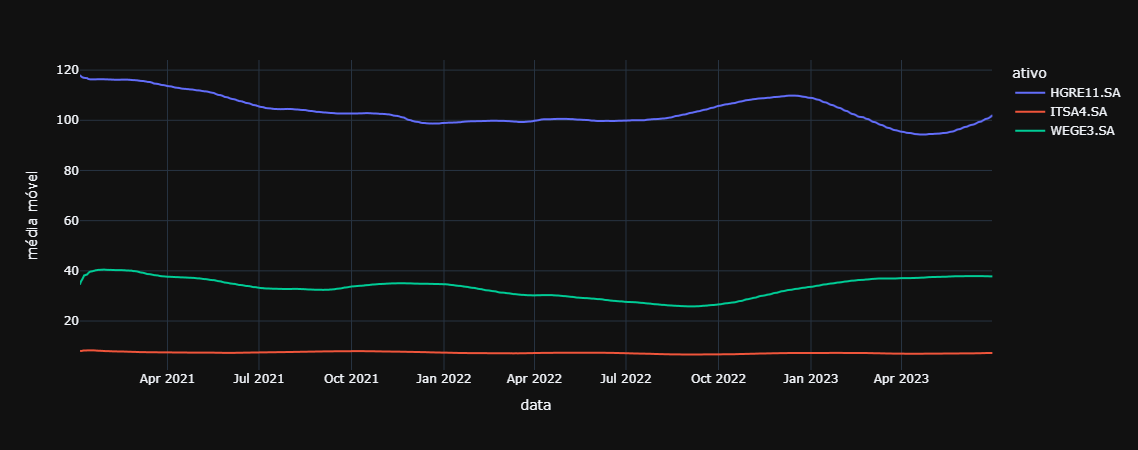

In [6]:
ativos_desvio_padrao = df_yahoo['Close'].rolling(90, min_periods=1).std()
ativos_desvio_padrao_vertical = ativos_desvio_padrao.stack().reset_index()
ativos_desvio_padrao_vertical.columns = ['data', 'ativo', 'desvio_padrao']

fig = px.line(ativos_desvio_padrao_vertical, x="data", y="desvio_padrao", color='ativo', template='plotly_dark')
fig.show()

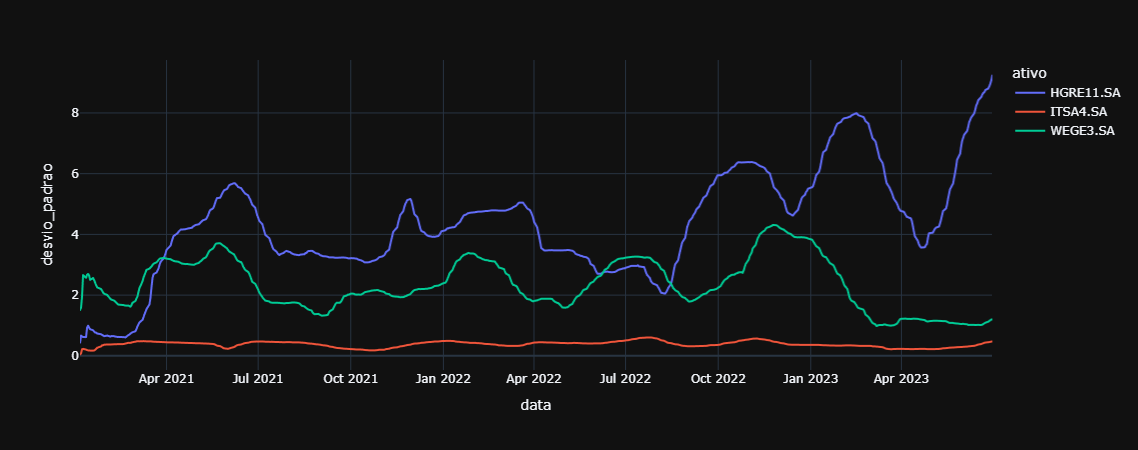

Com base nos gráficos da atividade anterior é visto que podemos chegar na mesma conclusão. 

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [8]:
lista_indicadores = ['Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['WEGE3.SA']*len(lista_indicadores)
colunas = list(zip(lista_indicadores, ativo))

wege = df_yahoo.loc['01/11/2022':, colunas]
wege.columns = lista_indicadores

wege.head()

,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,34.756062,35.580480,34.700167,35.328962,7219800
2021-01-05,36.889297,36.889297,34.467274,34.770028,16633600
2021-01-06,37.867443,38.878172,36.390936,36.968499,21507400
2021-01-07,39.432426,39.595447,38.118940,38.370459,15129600
2021-01-08,41.817196,41.915008,39.520930,39.567506,17381000


In [9]:
graph = {
    'x': wege.index,
    'open': wege.Open,
    'close': wege.Close,
    'high': wege.High,
    'low': wege.Low,
    'type': 'candlestick',
    'name': 'WEGE3.SA',
    'showlegend': True
}

In [10]:
grafico = graph_objects.Figure(
    data=[graph],
    layout_title="Índice Microsoft",
    # layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico


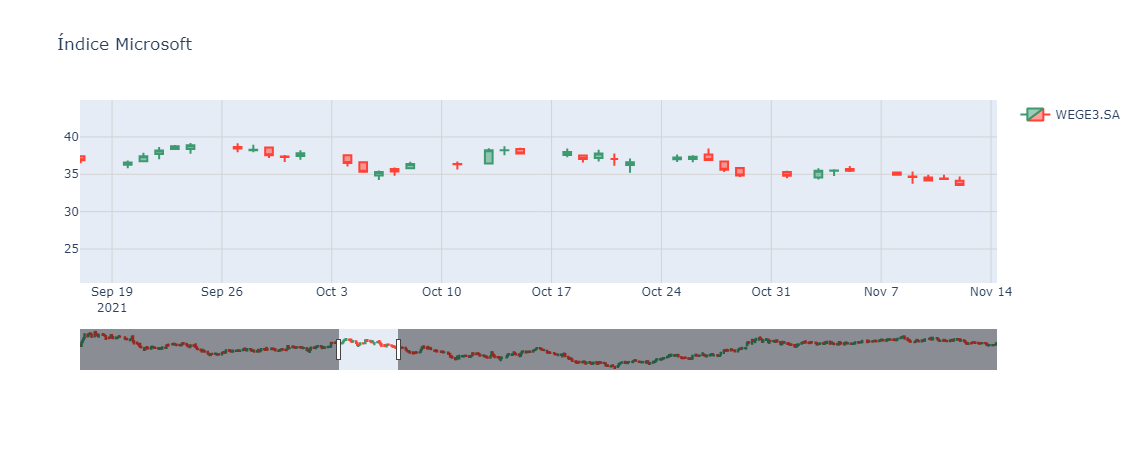